In [25]:
import os
import sys
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
# from toolsets.ff_droup import get_peaks
from toolsets.search import string_search, quick_search_values
import scipy.stats
import statsmodels.api as sm
from scipy import interpolate
import toolsets.spectra_operations as so
import toolsets.spectra_plotter as sp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# define master directories

In [3]:
raw_data_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230824_NMR_Spike_Exp_standardized'
# raw_data_dir = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/nmr'


# development

In [4]:
lut_smoothed, lut_raw = readin_nmr_profile('Luteolin_1_profile.csv', raw_data_dir)
spike_5_smoothed, spike_5_raw = readin_nmr_profile('Spike_5_profile.csv', raw_data_dir)
ribose_smoothed, ribose_raw = readin_nmr_profile('Ribose_1_profile.csv', raw_data_dir)# ribose still need fix
spike_1_smoothed, spike_1_raw =  readin_nmr_profile('Spike_1_profile.csv', raw_data_dir)
spike_01_smoothed, spike_01_raw =  readin_nmr_profile('Spike_0.1_profile.csv', raw_data_dir)
spike_05_smoothed, spike_05_raw =  readin_nmr_profile('Spike_0.5_profile.csv', raw_data_dir)
spike_001_smoothed, spike_001_raw = readin_nmr_profile('Spike_0.01_profile.csv', raw_data_dir)
spike_005_smoothed, spike_005_raw = readin_nmr_profile('Spike_0.05_profile.csv', raw_data_dir)
# spike01_raw =  readin_nmr_profile('Spike_0.1_profile.csv', raw_data_dir)
# spike05_raw=  readin_nmr_profile('Spike_0.5_profile.csv', raw_data_dir)
# lut_peaks, lut_smoothed, lut_raw = nmr_processing('Luteolin_1_profile.csv', raw_data_dir)
# spike5_peaks, spike5_smoothed, spike5_raw = nmr_processing('Spike_5_profile.csv', raw_data_dir,  if_all=True)

In [44]:
rspike_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230829_NMR_Reverse_Spike'

In [45]:
rspike_25_smoothed, rspike_25_raw = readin_nmr_profile('Spike_25_profile.csv', rspike_dir)
rspike_50_smoothed, rspike_50_raw = readin_nmr_profile('Spike_50_profile.csv', rspike_dir)
rspike_100_smoothed, rspike_100_raw = readin_nmr_profile('Spike_100_profile.csv', rspike_dir)

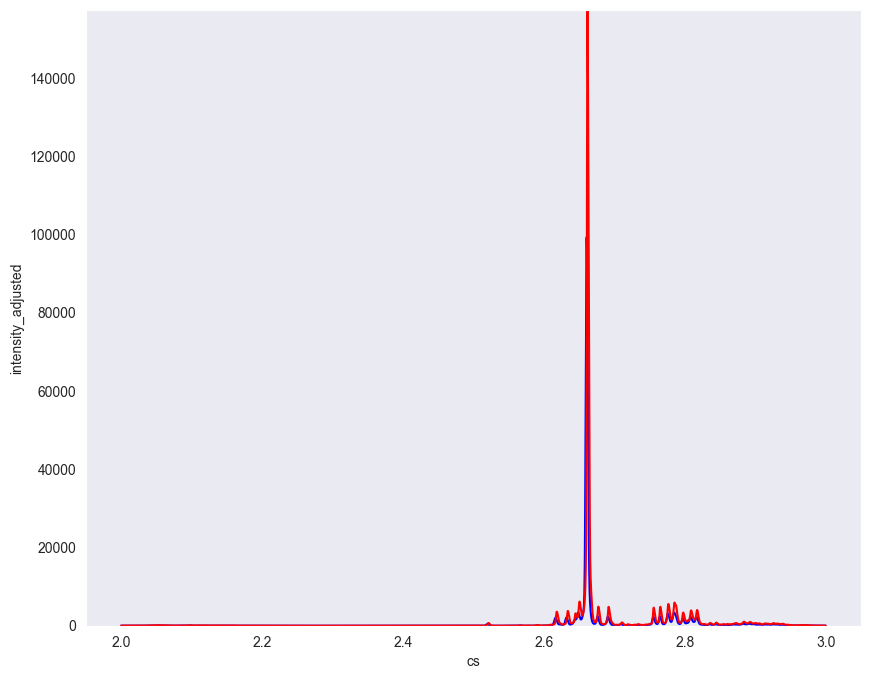

In [52]:
nmr_stack(rspike_25_smoothed, rspike_50_smoothed, cs_start=2, cs_end=3)

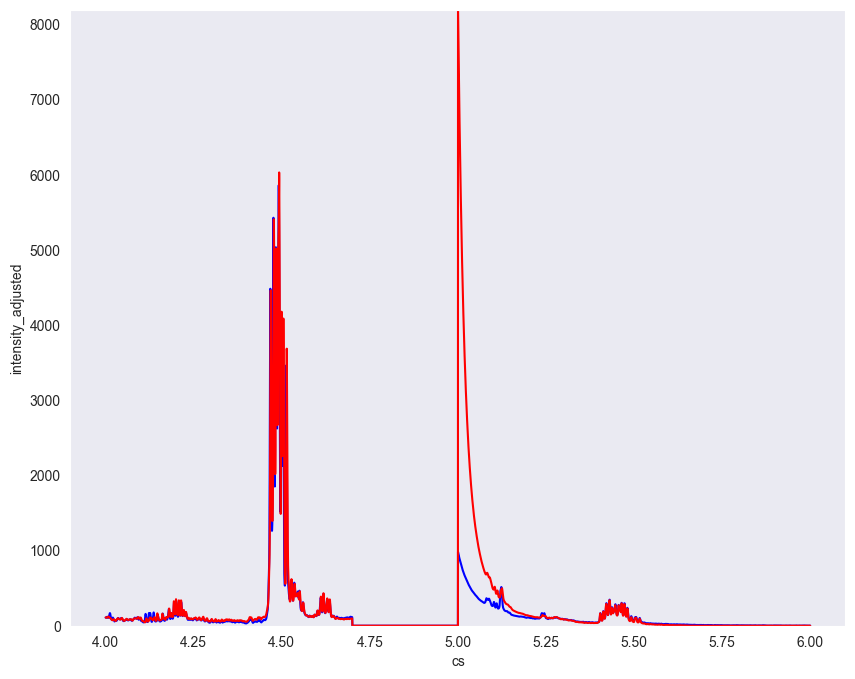

In [50]:
nmr_stack(rspike_50_smoothed, rspike_100_smoothed, cs_start=4, cs_end=6)

# lut

In [6]:
figure_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230824_NMR_Spike_Exp_standardized/figures'

In [44]:
ribose_1_result = nmr_processing(ribose_smoothed, spike_5_smoothed)
calculate_explained_area(ribose_1_result[0])

0.9873454879049761

In [42]:
ribose_1_result[0]

,peak_id,peak_apex,intensity,area,peak_start,peak_end,peak_length_half,peak_length_full,cluster_id,shift,corr,split,score,simulated_area,matched
2,941,3.917800,2415.695642,11.088928,3.914500,3.921650,0.004463,0.007150,1,0.010175,0.858971,3,0.409834,1.051038,True
3,942,3.923850,1144.100726,4.998884,3.921650,3.929596,0.004487,0.007946,1,0.010175,0.858971,3,0.409834,0.473807,True
1,940,3.911750,1381.111608,7.156733,3.902950,3.914500,0.004840,0.011550,1,0.010175,0.858971,3,0.409834,0.678334,True
17,874,3.453875,1357.186499,10.765834,3.448925,3.458825,0.009582,0.009900,8,0.013475,0.732229,3,0.349362,1.020414,True
16,873,3.446175,1060.022509,5.441054,3.439407,3.448925,0.005307,0.009518,8,0.013475,0.732229,3,0.349362,0.515717,True
18,875,3.462675,1288.766588,7.136476,3.458825,3.467900,0.006299,0.009075,8,0.013475,0.732229,3,0.349362,0.676414,True
10,911,3.721175,745.539926,3.920228,3.714172,3.723100,0.005303,0.008928,5,0.017050,0.702077,3,0.334976,0.371569,True
11,912,3.727225,1524.550798,8.467440,3.723100,3.730800,0.005774,0.007700,5,0.017050,0.702077,3,0.334976,0.802566,True
12,913,3.734100,1069.224055,5.221908,3.730800,3.737125,0.006325,0.006325,5,0.017050,0.702077,3,0.334976,0.494946,True
4,904,3.666725,446.231007,1.945548,3.663700,3.668925,0.005225,0.005225,2,0.020075,0.571859,3,0.272846,0.184404,True


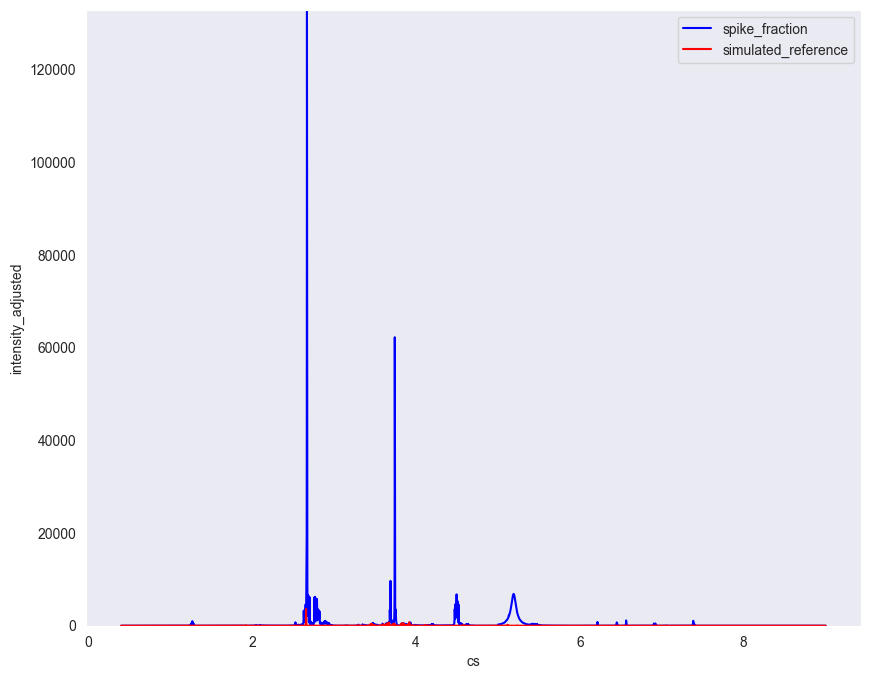

In [45]:
nmr_stack(spike_5_smoothed, ribose_1_result[1],
          # cs_start=3.85, cs_end=3.95,
          #        shift2=0.010175,
          save_path=os.path.join(figure_dir, 'ribose_spike5.png')
          )

In [48]:
lut_result = nmr_processing(lut_smoothed, spike_5_smoothed)
# calculate_explained_area(lut_result[0])

In [38]:
lut_result[0]

,peak_id,peak_apex,intensity,area,peak_start,peak_end,peak_length_half,peak_length_full,cluster_id,shift,corr,split,score,simulated_area,matched
5,1554,6.208000,3499.572292,11.110953,6.204781,6.210475,0.003607,0.005694,4,0.012925,0.867247,2,0.261067,0.036899,True
6,1555,6.212125,3684.056732,12.740031,6.210475,6.216704,0.003808,0.006229,4,0.012925,0.867247,2,0.261067,0.042309,True
9,1949,7.397100,2162.918577,7.925786,7.392425,7.400125,0.003590,0.007700,7,0.011000,0.754715,2,0.227192,0.026321,True
10,1950,7.401500,1402.164045,4.832378,7.400125,7.406748,0.003530,0.006623,7,0.011000,0.754715,2,0.227192,0.016048,True
1,1948,7.381700,8199.604451,38.527349,7.376097,7.387476,0.003943,0.011379,1,0.012375,0.905819,1,0.159507,0.127947,False
0,631,2.658850,62707.768226,192.444781,2.656233,2.662583,0.002980,0.006350,0,0.011000,0.895436,1,0.157678,0.639096,True
3,1634,6.442300,3753.877963,11.941452,6.438769,6.444775,0.003644,0.006006,3,0.018150,0.472812,2,0.142330,0.039657,False
4,1635,6.446425,3728.385447,12.625655,6.444775,6.451028,0.003709,0.006253,3,0.018150,0.472812,2,0.142330,0.041929,False
8,1792,6.898525,2469.562471,12.160874,6.892297,6.903931,0.004327,0.011634,6,0.011000,0.751230,1,0.132285,0.040385,False
12,448,1.934500,687.258751,2.281889,1.931159,1.938672,0.003140,0.007513,9,-0.008525,0.742507,1,0.130749,0.007578,True


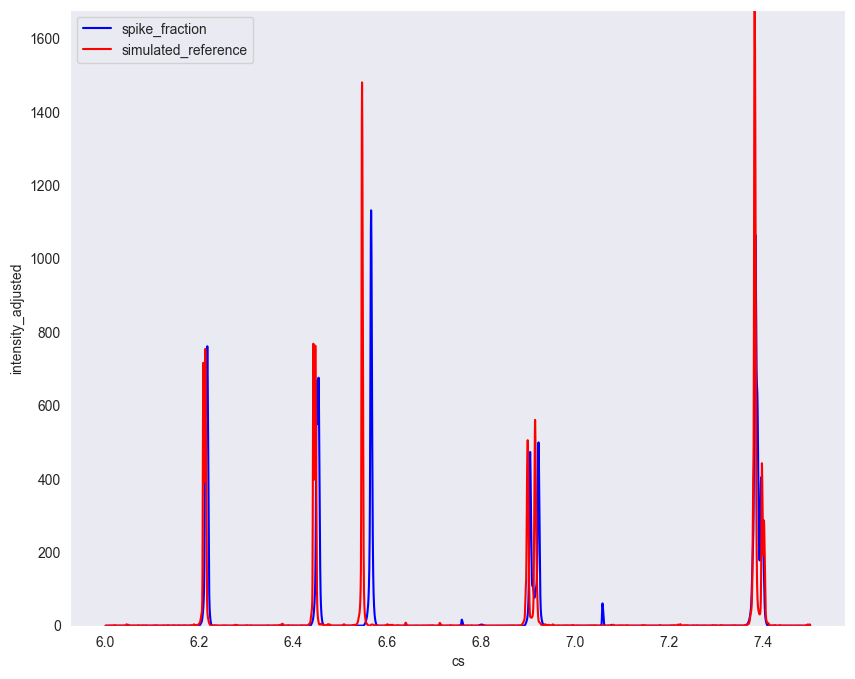

In [50]:
nmr_stack(spike_5_smoothed, lut_result[1],
          cs_start=6, cs_end=7.5,
          # shift2=0.012925,
          save_path=os.path.join(figure_dir, 'lut_spike5_zoomed_6to7.5.png')
          )

In [138]:
ribose_1_result[2]

,ratio,peak_id,peak_apex,intensity,area,peak_start,peak_end,peak_length_half,peak_length_full,cluster_id,...,split,score,fraction_peak_id,fraction_peak_apex,fraction_intensity,fraction_area,fraction_peak_start,fraction_peak_end,fraction_peak_length_half,fraction_peak_length_full
0,107.640356,911,3.721175,745.539926,3.920228,3.714172,3.723100,0.005303,0.008928,5,...,3,0.337908,1058.0,3.743175,80250.183201,322.708562,3.738848,3.748521,0.003656,0.009673
1,3.950073,913,3.734100,1069.224055,5.221908,3.730800,3.737125,0.006325,0.006325,5,...,3,0.337908,1059.0,3.752800,4223.513164,33.064602,3.749775,3.768661,0.006660,0.018886
2,52.638576,912,3.727225,1524.550798,8.467440,3.723100,3.730800,0.005774,0.007700,5,...,3,0.337908,1058.0,3.743175,80250.183201,322.708562,3.738848,3.748521,0.003656,0.009673


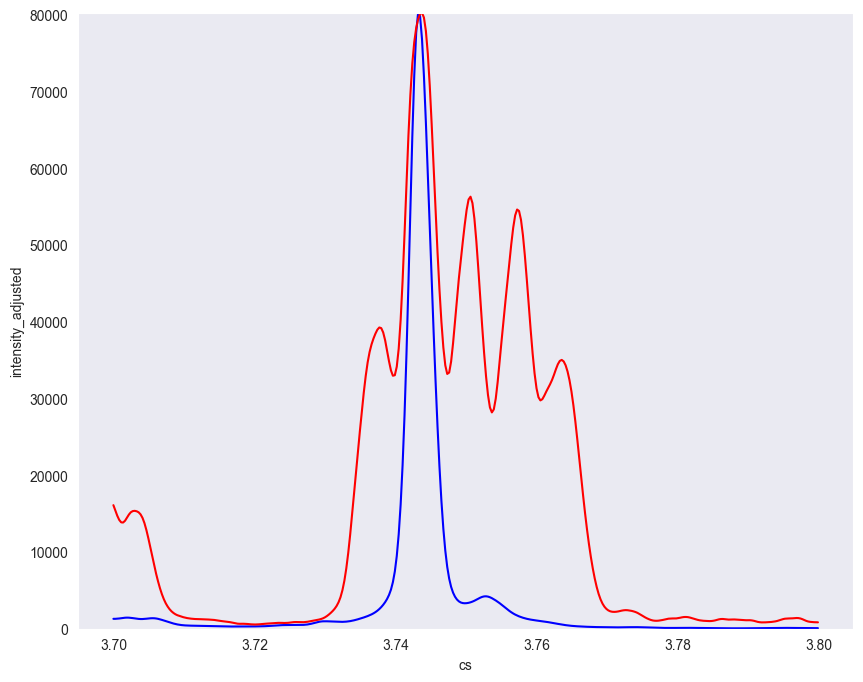

In [140]:
nmr_stack(spike_01_smoothed, ribose_1_result[1], cs_start=3.7, cs_end=3.8,
          shift2=0.0165
          )

In [115]:
calculate_explained_area(ribose_1_result[0])

0.9920808587293182

In [79]:
lut_5_results =nmr_processing(lut_smoothed, spike_5_smoothed)

0.20463705626402773


In [87]:
lut_5_results[0]

,peak_id,peak_apex,intensity,area,peak_start,peak_end,peak_length_half,peak_length_full,cluster_id,shift,corr,split,score,simulated_area,matched
5,1554,6.208000,3499.572292,11.110953,6.204781,6.210475,0.003607,0.005694,4,0.004125,0.928726,2,0.279574,2.273713,True
6,1555,6.212125,3684.056732,12.740031,6.210475,6.216704,0.003808,0.006229,4,0.004125,0.928726,2,0.279574,2.607082,True
3,1634,6.442300,3753.877963,11.941452,6.438769,6.444775,0.003644,0.006006,3,0.006875,0.885669,2,0.266613,2.443664,True
4,1635,6.446425,3728.385447,12.625655,6.444775,6.451028,0.003709,0.006253,3,0.006875,0.885669,2,0.266613,2.583677,True
9,1949,7.397100,2162.918577,7.925786,7.392425,7.400125,0.003590,0.007700,7,-0.000000,0.742585,2,0.223540,1.621909,True
10,1950,7.401500,1402.164045,4.832378,7.400125,7.406748,0.003530,0.006623,7,-0.000000,0.742585,2,0.223540,0.988884,True
0,631,2.658850,62707.768226,192.444781,2.656233,2.662583,0.002980,0.006350,0,0.011550,0.877105,1,0.154451,39.381333,True
1,1948,7.381700,8199.604451,38.527349,7.376097,7.387476,0.003943,0.011379,1,0.001375,0.852911,1,0.150190,7.884123,True
11,830,3.299875,838.755992,2.973609,3.288906,3.300136,0.002562,0.011231,8,-0.000000,0.808062,1,0.142293,0.608511,True
8,1792,6.898525,2469.562471,12.160874,6.892297,6.903931,0.004327,0.011634,6,0.005500,0.779295,1,0.137227,2.488565,True


In [95]:
lut_1_results =nmr_processing(lut_smoothed, spike_1_smoothed)

0.048592438083126896


In [96]:
lut_1_results[0]

,peak_id,peak_apex,intensity,area,peak_start,peak_end,peak_length_half,peak_length_full,cluster_id,shift,corr,split,score,simulated_area,matched
5,1554,6.208000,3499.572292,11.110953,6.204781,6.210475,0.003607,0.005694,4,0.010725,0.866224,2,0.260760,0.539908,True
6,1555,6.212125,3684.056732,12.740031,6.210475,6.216704,0.003808,0.006229,4,0.010725,0.866224,2,0.260760,0.619069,True
9,1949,7.397100,2162.918577,7.925786,7.392425,7.400125,0.003590,0.007700,7,0.008525,0.751487,2,0.226220,0.385133,True
10,1950,7.401500,1402.164045,4.832378,7.400125,7.406748,0.003530,0.006623,7,0.008525,0.751487,2,0.226220,0.234817,True
3,1634,6.442300,3753.877963,11.941452,6.438769,6.444775,0.003644,0.006006,3,0.015125,0.673948,2,0.202878,0.580264,True
4,1635,6.446425,3728.385447,12.625655,6.444775,6.451028,0.003709,0.006253,3,0.015125,0.673948,2,0.202878,0.613511,True
1,1948,7.381700,8199.604451,38.527349,7.376097,7.387476,0.003943,0.011379,1,0.010175,0.898460,1,0.158211,1.872138,True
0,631,2.658850,62707.768226,192.444781,2.656233,2.662583,0.002980,0.006350,0,0.009900,0.890472,1,0.156804,9.351361,True
12,448,1.934500,687.258751,2.281889,1.931159,1.938672,0.003140,0.007513,9,-0.007975,0.810938,1,0.142799,0.110883,True
8,1792,6.898525,2469.562471,12.160874,6.892297,6.903931,0.004327,0.011634,6,0.009625,0.759755,1,0.133786,0.590926,True


In [105]:
lut_05_results =nmr_processing(lut_smoothed, spike_05_smoothed)

0.025732320320484912


In [106]:
lut_05_results[0]

,peak_id,peak_apex,intensity,area,peak_start,peak_end,peak_length_half,peak_length_full,cluster_id,shift,corr,split,score,simulated_area,matched
5,1554,6.208000,3499.572292,11.110953,6.204781,6.210475,0.003607,0.005694,4,0.011275,0.873515,2,0.262954,0.285911,True
6,1555,6.212125,3684.056732,12.740031,6.210475,6.216704,0.003808,0.006229,4,0.011275,0.873515,2,0.262954,0.327831,True
9,1949,7.397100,2162.918577,7.925786,7.392425,7.400125,0.003590,0.007700,7,0.009350,0.759793,2,0.228721,0.203949,True
10,1950,7.401500,1402.164045,4.832378,7.400125,7.406748,0.003530,0.006623,7,0.009350,0.759793,2,0.228721,0.124348,True
3,1634,6.442300,3753.877963,11.941452,6.438769,6.444775,0.003644,0.006006,3,0.016775,0.640680,2,0.192864,0.307281,True
4,1635,6.446425,3728.385447,12.625655,6.444775,6.451028,0.003709,0.006253,3,0.016775,0.640680,2,0.192864,0.324887,True
1,1948,7.381700,8199.604451,38.527349,7.376097,7.387476,0.003943,0.011379,1,0.010725,0.903348,1,0.159072,0.991398,True
0,631,2.658850,62707.768226,192.444781,2.656233,2.662583,0.002980,0.006350,0,0.010175,0.894199,1,0.157461,4.952051,True
12,448,1.934500,687.258751,2.281889,1.931159,1.938672,0.003140,0.007513,9,-0.008250,0.788446,1,0.138838,0.058718,True
8,1792,6.898525,2469.562471,12.160874,6.892297,6.903931,0.004327,0.011634,6,0.009900,0.768226,1,0.135278,0.312927,False


In [108]:
calculate_explained_area(lut_05_results[0])

0.9276981906614118

In [97]:
lut_01_results =nmr_processing(lut_smoothed, spike_01_smoothed)

0.005366951745629411


In [98]:
lut_01_results[0]

,peak_id,peak_apex,intensity,area,peak_start,peak_end,peak_length_half,peak_length_full,cluster_id,shift,corr,split,score,simulated_area,matched
5,1554,6.208000,3499.572292,11.110953,6.204781,6.210475,0.003607,0.005694,4,0.012650,0.847140,2,0.255015,0.059632,True
6,1555,6.212125,3684.056732,12.740031,6.210475,6.216704,0.003808,0.006229,4,0.012650,0.847140,2,0.255015,0.068375,True
9,1949,7.397100,2162.918577,7.925786,7.392425,7.400125,0.003590,0.007700,7,0.011000,0.687348,2,0.206912,0.042537,True
10,1950,7.401500,1402.164045,4.832378,7.400125,7.406748,0.003530,0.006623,7,0.011000,0.687348,2,0.206912,0.025935,True
3,1634,6.442300,3753.877963,11.941452,6.438769,6.444775,0.003644,0.006006,3,0.017875,0.547701,2,0.164874,0.064089,True
4,1635,6.446425,3728.385447,12.625655,6.444775,6.451028,0.003709,0.006253,3,0.017875,0.547701,2,0.164874,0.067761,True
1,1948,7.381700,8199.604451,38.527349,7.376097,7.387476,0.003943,0.011379,1,0.012375,0.896261,1,0.157824,0.206774,True
0,631,2.658850,62707.768226,192.444781,2.656233,2.662583,0.002980,0.006350,0,0.011550,0.845960,1,0.148966,1.032842,True
8,1792,6.898525,2469.562471,12.160874,6.892297,6.903931,0.004327,0.011634,6,0.011000,0.773858,1,0.136270,0.065267,False
7,1793,6.914475,2740.581026,12.984978,6.909179,6.920680,0.004316,0.011501,5,-0.005225,0.748155,1,0.131743,0.069690,False


In [103]:
calculate_explained_area(lut_01_results[0])

0.8551246925140882

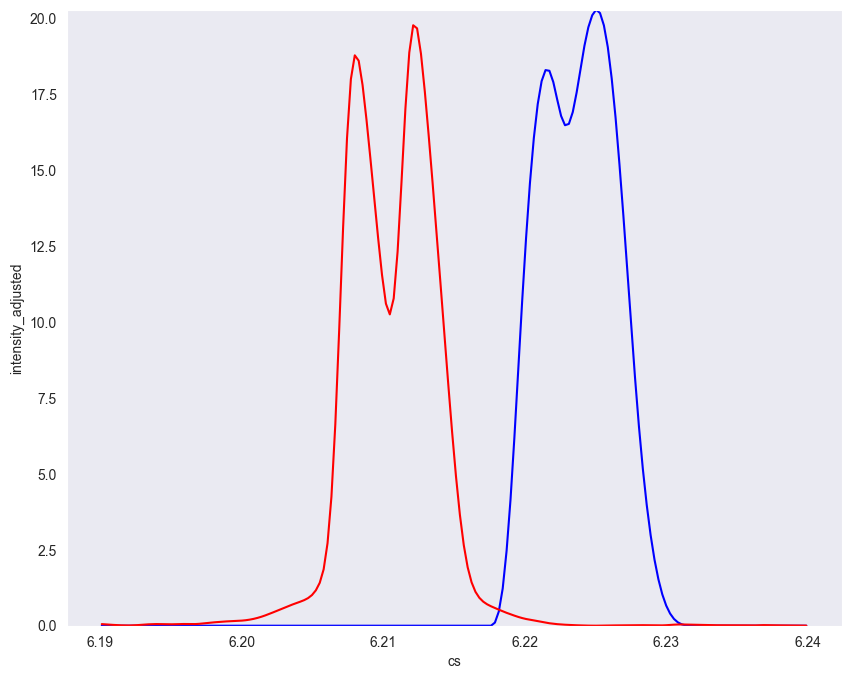

In [104]:
nmr_stack(spike_01_smoothed, lut_01_results[1], cs_start=6.19, cs_end=6.24)

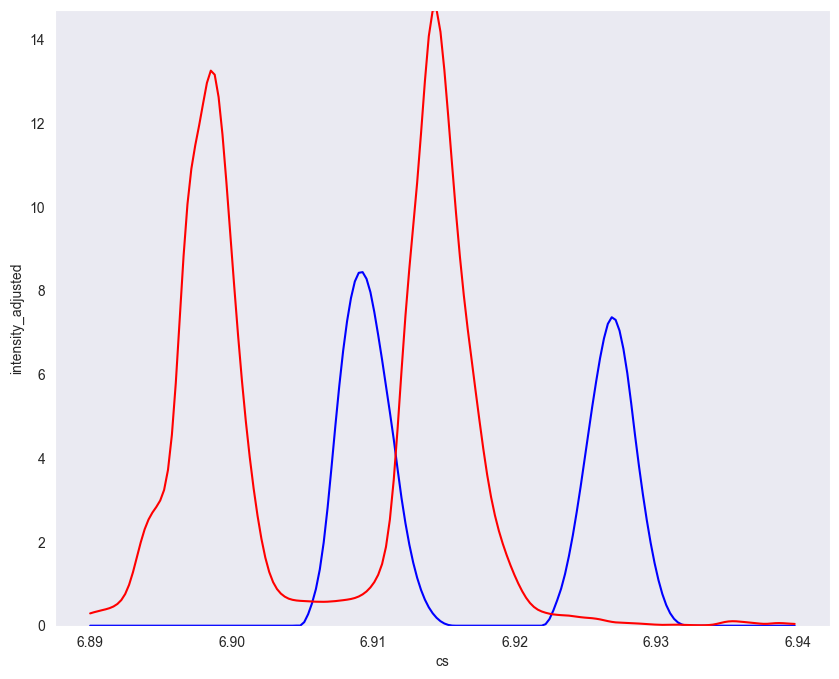

In [101]:
nmr_stack(spike_01_smoothed, lut_01_results[1], cs_start=6.89, cs_end=6.94)

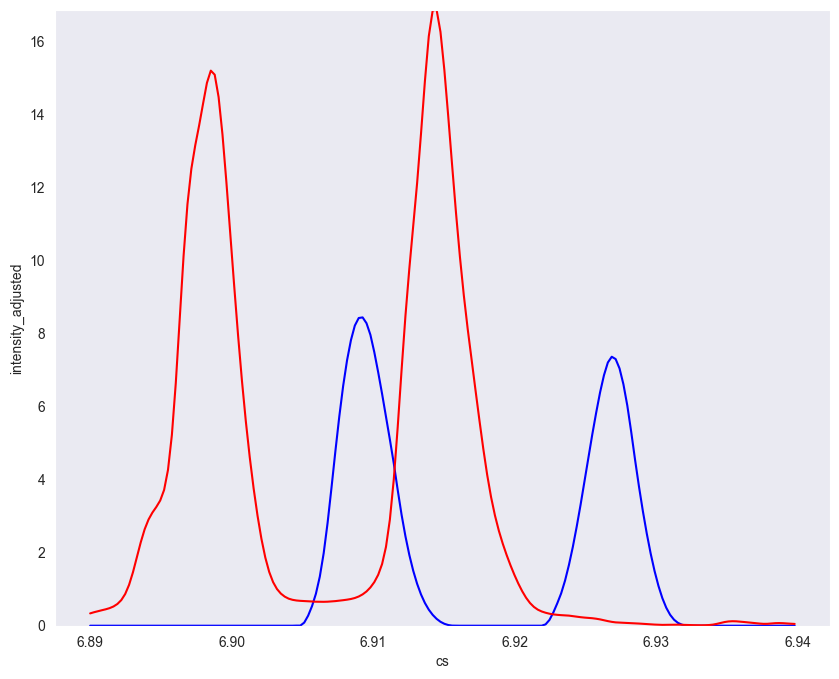

In [55]:
nmr_stack(spike_01_smoothed, lut_01_results[1], cs_start=6.89, cs_end=6.94)

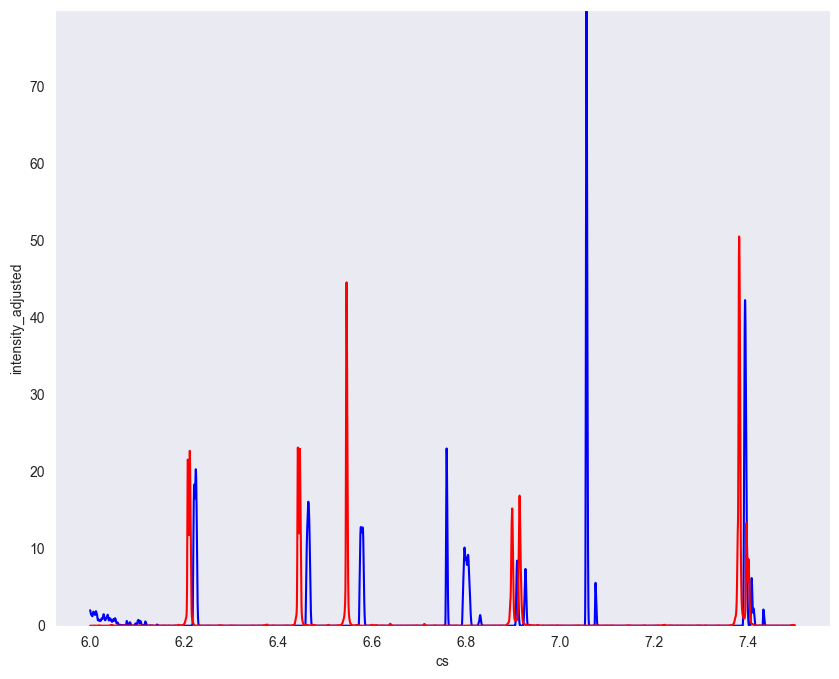

In [554]:
nmr_stack(spike_01_smoothed, lut_01_results[1], save_path=os.path.join(figure_dir, 'lut_spike_01_zoomed.png'), cs_start=6, cs_end=7.5)